In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

from skimage import io, color, filters, morphology, measure
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans

import scipy
from scipy import ndimage

from skimage import measure, color, io
import imutils

In [2]:
img = cv2.imread('data/small.png')
rows, cols, bands = img.shape
X = img.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

292
330
3


In [3]:
img_g = cv2.imread('data/small.png', 0)

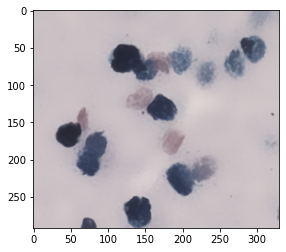

In [4]:
#let's start with edge detection... 
#preprocessing
blur = cv2.bilateralFilter(img, 30,75,75)
plt.imshow(blur)

In [5]:
blur1 = blur[:,:,1]

#plt.imshow(blur1, cmap='gray')

In [6]:
#hue, saturation, value
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

https://scipy-lectures.org/packages/scikit-image/index.html
check this out might have solution to the blob issue (watershed segmentation and/or random walker segmentation) 

In [7]:
ret1, thresh = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY_INV)

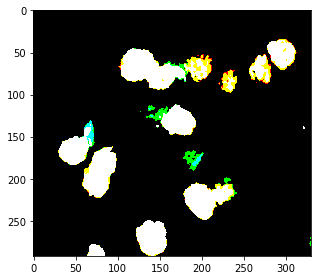

In [8]:
#threshold
io.imshow(thresh)

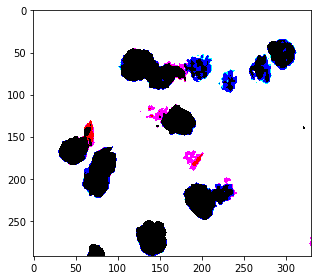

In [10]:
ret1, thresh = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY)
io.imshow(thresh)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

#sure background
sure_bg = cv2.dilate(opening,kernel,iterations=2)
plt.imshow(sure_bg) 

In [396]:
#[255,0,255] fushia
#[255, 0, 0] red
# [0, 0, 255] blue
# [0, 255, 255] cyan
# [255, 255, 0] yellow

In [397]:
# #only look at red?
# b = thresh.copy()
# # set green and red channels to 0
# b[:, :, 0] = 0
# b[:, :, 1] = 0


# g = thresh.copy()
# # set blue and red channels to 0
# g[:, :, 2] = 0
# g[:, :, 0] = 0

# r = thresh.copy()
# # set blue and green channels to 0
# r[:, :, 1] = 0
# r[:, :, 2] = 0

In [11]:
# io.imshow(g)

In [13]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel) 

In [12]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

In [331]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [318]:
## findcontours
cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 3
s2 = 20
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

Dots number: 2
